In [20]:
# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data using Pandas Read

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

In [22]:
# Read in HTML tables into a DataFrame
df = pd.read_html('https://static.bc-edx.com/data/web/mars_facts/temperature.html')

In [23]:
# Select the table
mars_df = df[0]

In [24]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [25]:
# Exame data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [26]:
# Change data types for data analysis
mars_df['terrestrial_date']=pd.to_datetime(mars_df['terrestrial_date'])

In [27]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [28]:
## Start Data Analysis

In [29]:
# How many months exists on Mars
mars_n_months = len(pd.unique(mars_df['month']))
mars_n_months


12

In [30]:

# How many Martian (and not Earth) days worth of data exist in the scrapped dataset
mars_days = mars_df['month'].count()
mars_days

1867

In [31]:
# Determin the coldest and the warmest months on Mars (at the location of curiosity)? 
# Find the average minimum daily temperature for all of the months
avg_min_temp = mars_df.groupby('month')['min_temp'].mean()
avg_min_temp

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

In [32]:
coldest_month = min(avg_min_temp)
coldest_month

-83.30729166666667

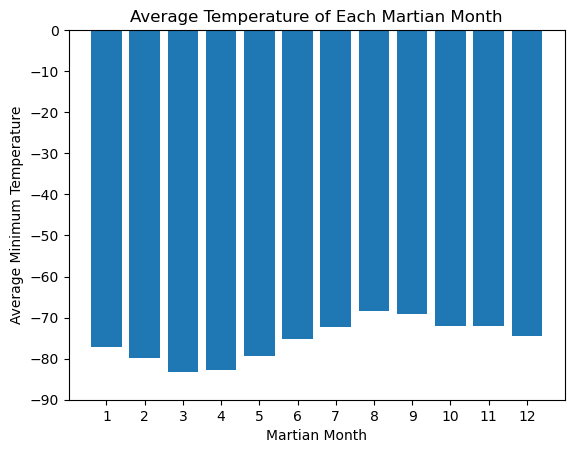

The 3rd month has the coldest average minmum temperature of -83.30729166666667.
The 8th month has the warmest average minmum temperature of -68.38297872340425.


In [33]:
# Use Matplotlib to plot a bar chart
fig = plt.bar(avg_min_temp.index.values, avg_min_temp.values)
# Set title and labels
plt.title("Average Temperature of Each Martian Month")
plt.xlabel('Martian Month')
plt.ylabel('Average Minimum Temperature')
plt.xticks(avg_min_temp.index.values)
plt.ylim(-90,0)
plt.show()
print(f'The 3rd month has the coldest average minmum temperature of {min(avg_min_temp)}.')
print(f'The 8th month has the warmest average minmum temperature of {max(avg_min_temp)}.')

In [34]:
# Determin months having the lowest and the highest atmospheric pressure on Mars
# Find the average daily atomospheric pressure of all the months
avg_pressure = mars_df.groupby('month')['pressure'].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

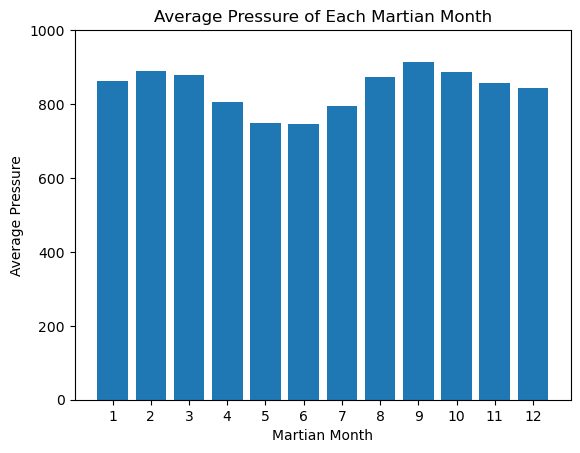

The 6th month has the lowest atmospheric pressure of 745.0544217687075.
The 9th month has the highest atmospheric pressure of 913.3059701492538.


In [35]:
# Plot the results as a bar chart using matplotlip
fig = plt.bar(avg_pressure.index.values, avg_pressure.values)
# Set title and labels
plt.title("Average Pressure of Each Martian Month")
plt.xlabel('Martian Month')
plt.ylabel('Average Pressure')
plt.xticks(avg_pressure.index.values)
plt.ylim(0,1000)
plt.show()
print(f'The 6th month has the lowest atmospheric pressure of {min(avg_pressure)}.')
print(f'The 9th month has the highest atmospheric pressure of {max(avg_pressure)}.')

 Roughly 650-675 terrestrial days in a Martian year based on the temperature cycles.


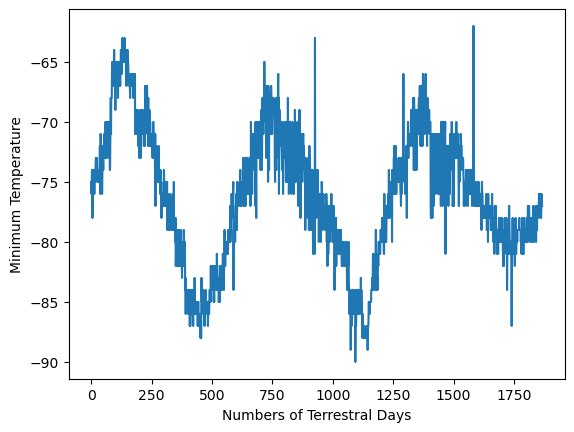

In [36]:
# Determin terrestrial (Earth) days exist in a Martian year
# Consider how many days elapse on Earth in the time that Mars circles the Sun once.
# Visually estimate the result by plotting the daily minimum temperature.
plt.plot(mars_df['min_temp'])
plt.xlabel("Numbers of Terrestral Days")
plt.ylabel('Minimum Temperature')
print(f' Roughly 650-675 terrestrial days in a Martian year based on the temperature cycles.')

In [37]:
# Write the data to a CSV
# from pathlib import Path
# filepath = Path('..\output_data\mars.csv')
mars_df.to_csv('../Mod11/mars.csv', index=False)